In [2]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from CSV file
data = pd.read_csv('medical_clean.csv')

# split groups based on ReAdmis variable
group_yes = data[data['ReAdmis'] == 'Yes']['Age']
group_no = data[data['ReAdmis'] == 'No']['Age']

# two-sample t-test
t_stat, p_value = ttest_ind(group_no, group_yes, equal_var=False)

n1 = len(group_yes)
n2 = len(group_no)
s1_sq = group_yes.var()
s2_sq = group_no.var()

# Calculate degrees of freedom for Welch t-test
numerator = (s1_sq / n1 + s2_sq / n2)**2
denominator = ((s1_sq / n1)**2 / (n1 - 1)) + ((s2_sq / n2)**2 / (n2 - 1))
df = numerator / denominator

print(f"Variable: Age")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {df}")
if p_value <= 0.05:
    print("Null hypothesis is rejected as p-value is less than 0.05")
else:
    print("Null hypothesis is not rejected as p-value is greater than 0.05")
print("\n")


Variable: Age
T-Statistic: -1.5837433260204408
P-Value: 0.11329320824525713
Degrees of Freedom: 7700.033040154133
Null hypothesis is not rejected as p-value is greater than 0.05




In [3]:
# Filter the data to include only rows where "ReAdmis" is "Yes"
yes_readmis_data = data[data['ReAdmis'] == 'Yes']


#value counts for both categorical variables 
print("ReAdmis value counts:")
print(data['ReAdmis'].value_counts())

print("\nComplication_risk value counts:")
print(data['Complication_risk'].value_counts())

print("\nComplication_risk value counts (where ReAdmis = Yes):")
print(yes_readmis_data['Complication_risk'].value_counts())

#statistics for both continuous variables 
print("\nInitial_days:")
print(data['Initial_days'].describe())
print("\nInitial_days (where ReAdmis = yes)")
print(yes_readmis_data['Initial_days'].describe())

print("\nDoc_visits:")
print(data['Doc_visits'].describe())
print("\nDoc visits (where ReAdmis = yes)")
print(yes_readmis_data['Doc_visits'].describe())

ReAdmis value counts:
No     6331
Yes    3669
Name: ReAdmis, dtype: int64

Complication_risk value counts:
Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

Complication_risk value counts (where ReAdmis = Yes):
Medium    1664
High      1223
Low        782
Name: Complication_risk, dtype: int64

Initial_days:
count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

Initial_days (where ReAdmis = yes)
count    3669.000000
mean       63.859507
std         5.078382
min        48.433580
25%        59.697530
50%        64.321770
75%        68.311710
max        71.981490
Name: Initial_days, dtype: float64

Doc_visits:
count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, 

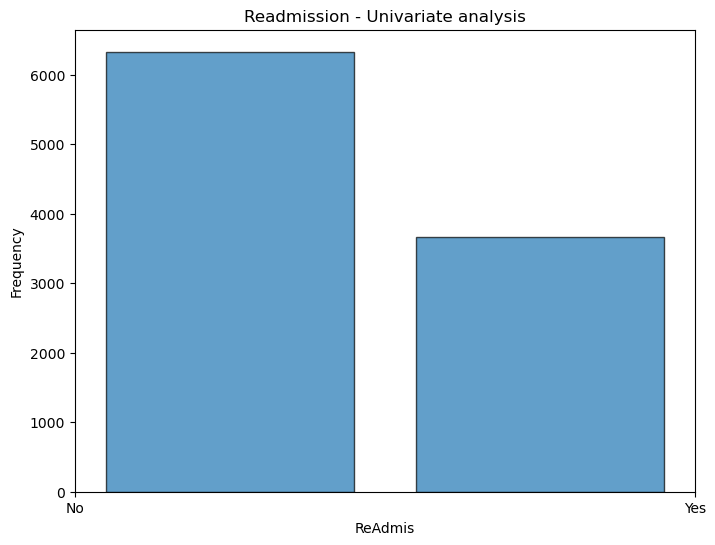

In [5]:
# histogram for the ReAdmis column
plt.figure(figsize=(8, 6))
plt.hist(data['ReAdmis'], bins=2, edgecolor='k', alpha=0.7, rwidth=0.8, align='mid')
plt.xlabel('ReAdmis')
plt.ylabel('Frequency')
plt.title('Readmission - Univariate analysis')
plt.xticks(['No', 'Yes'], ha='center')
plt.show()

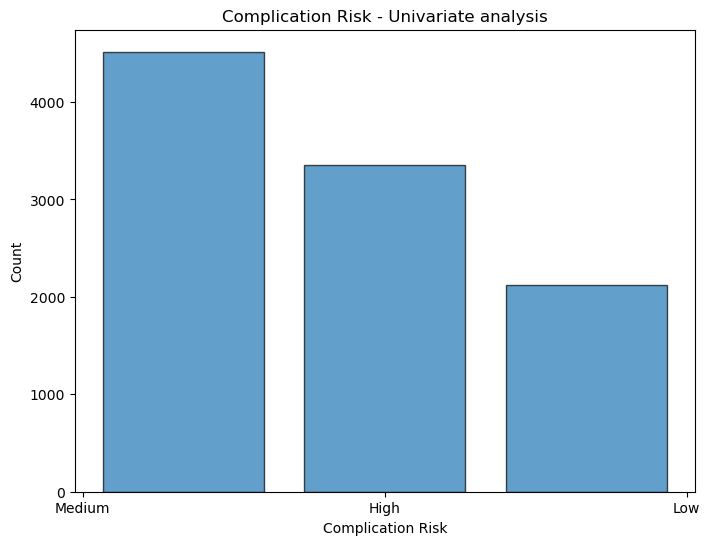

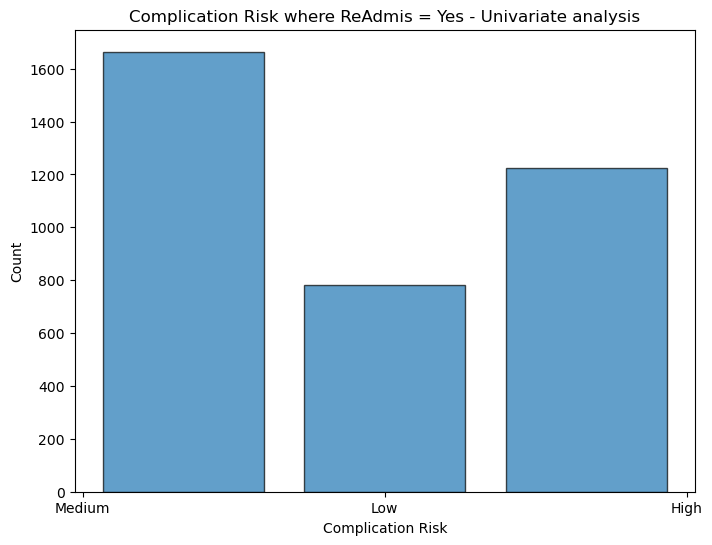

In [4]:
# histogram for the Initial_admin column
plt.figure(figsize=(8, 6))
plt.hist(data['Complication_risk'], bins=len(data['Complication_risk'].unique()), edgecolor='k', alpha=0.7, rwidth=0.8, align='mid')
plt.xlabel('Complication Risk')
plt.ylabel('Count')
plt.title('Complication Risk - Univariate analysis')
plt.show()


# histogram for the Initial_admin column where ReAdmis = yes
plt.figure(figsize=(8, 6))
plt.hist(yes_readmis_data['Complication_risk'], bins=len(yes_readmis_data['Complication_risk'].unique()), edgecolor='k', alpha=0.7, rwidth=0.8, align='mid')
plt.xlabel('Complication Risk')
plt.ylabel('Count')
plt.title('Complication Risk where ReAdmis = Yes - Univariate analysis')
plt.show()

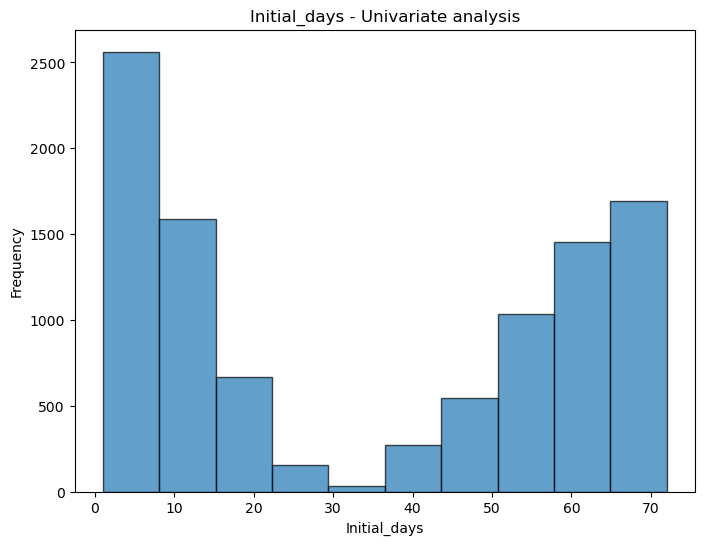

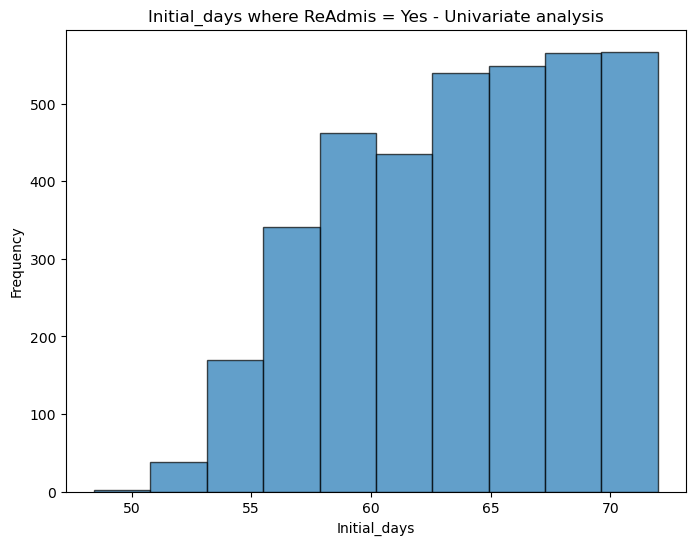

In [6]:
# histogram for initial days
plt.figure(figsize=(8, 6))
plt.hist(data['Initial_days'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Initial_days')
plt.ylabel('Frequency')
plt.title('Initial_days - Univariate analysis')
plt.show()


# histogram for initial days
plt.figure(figsize=(8, 6))
plt.hist(yes_readmis_data['Initial_days'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Initial_days')
plt.ylabel('Frequency')
plt.title('Initial_days where ReAdmis = Yes - Univariate analysis')
plt.show()

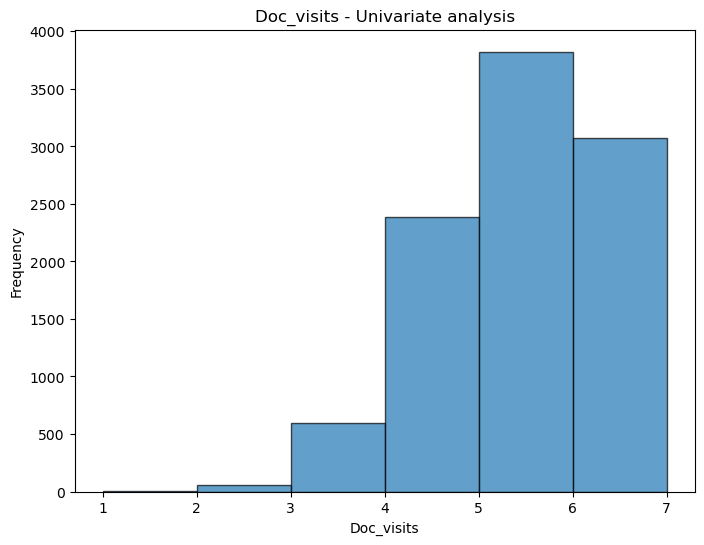

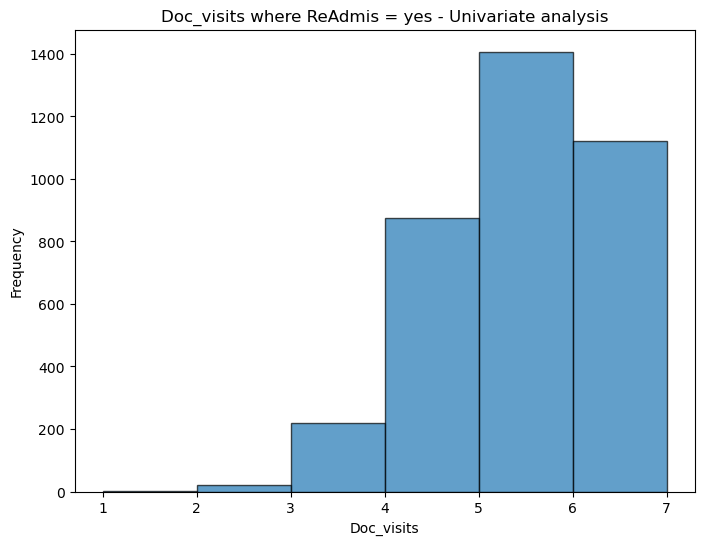

In [7]:
# histogram for Doc_visits
plt.figure(figsize=(8, 6))
plt.hist(data['Doc_visits'], bins=range(1, 8), edgecolor='k', alpha=0.7)
plt.xlabel('Doc_visits')
plt.ylabel('Frequency')
plt.title('Doc_visits - Univariate analysis')
plt.xticks(range(1, 8))
plt.show()


# histogram for Doc_visits where ReAdmis = yes
plt.figure(figsize=(8, 6))
plt.hist(yes_readmis_data['Doc_visits'], bins=range(1, 8), edgecolor='k', alpha=0.7)
plt.xlabel('Doc_visits')
plt.ylabel('Frequency')
plt.title('Doc_visits where ReAdmis = yes - Univariate analysis')
plt.xticks(range(1, 8))
plt.show()



Initial_admin value counts:
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

Initial_admin value counts (where ReAdmis = Yes):
Emergency Admission      1904
Elective Admission        896
Observation Admission     869
Name: Initial_admin, dtype: int64

Age:
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

Age (where ReAdmis = yes):
count    3669.000000
mean       53.940311
std        20.554420
min        18.000000
25%        36.000000
50%        54.000000
75%        72.000000
max        89.000000
Name: Age, dtype: float64


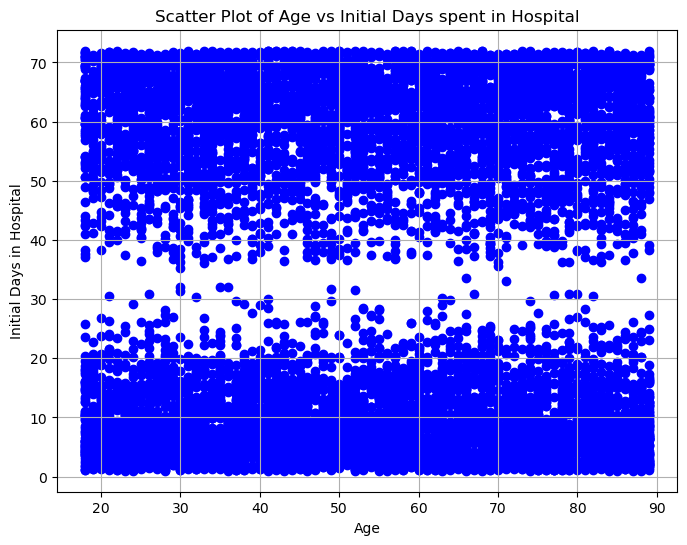

In [46]:
# value counts for both categorical variables 
print("\nInitial_admin value counts:")
print(data['Initial_admin'].value_counts())

print("\nInitial_admin value counts (where ReAdmis = Yes):")
print(yes_readmis_data['Initial_admin'].value_counts())

# statistics for remaining continuous variable
print("\nAge:")
print(data['Age'].describe())
print("\nAge (where ReAdmis = yes):")
print(yes_readmis_data['Age'].describe())

# scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Initial_days'], color='blue', marker='o')
plt.title('Scatter Plot of Age vs Initial Days spent in Hospital')
plt.xlabel('Age')
plt.ylabel('Initial Days in Hospital')
plt.grid(True)

plt.show()

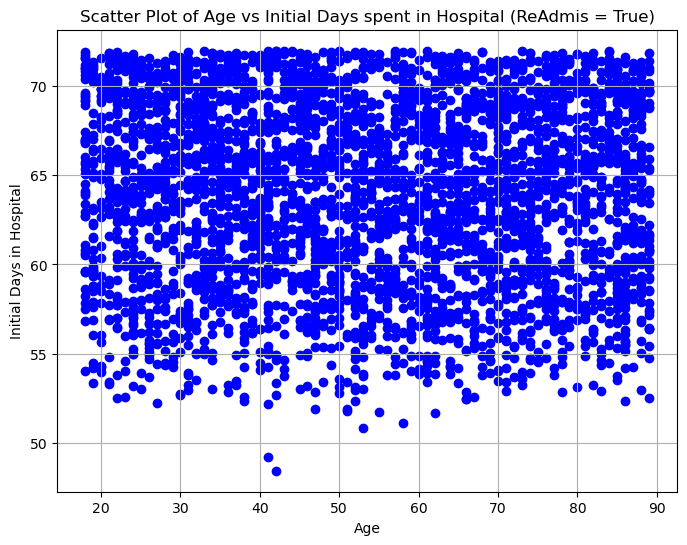

In [47]:
# scatterplot of patient age vs initial days spent in hospital
plt.figure(figsize=(8, 6))
plt.scatter(yes_readmis_data['Age'], yes_readmis_data['Initial_days'], color='blue', marker='o')
plt.title('Scatter Plot of Age vs Initial Days spent in Hospital (ReAdmis = True)')
plt.xlabel('Age')
plt.ylabel('Initial Days in Hospital')
plt.grid(True)

plt.show()

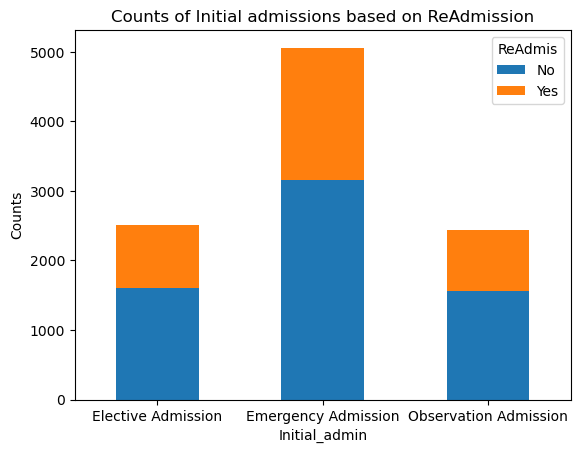

In [48]:
df = pd.DataFrame(data)

pivot_data = data.pivot_table(index='Initial_admin', columns='ReAdmis', aggfunc='size', fill_value=0)

ax = pivot_data.plot(kind='bar', stacked=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.xlabel('Initial_admin')
plt.ylabel('Counts')
plt.title('Counts of Initial admissions based on ReAdmission')
plt.legend(title='ReAdmis', loc='upper right')

plt.show()